In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [13]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
conn = engine.connect()

In [20]:
inspector = inspect(engine)

In [21]:
inspector.get_table_names()

['measurement', 'station']

In [22]:
for column in inspector.get_columns('measurement'):
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
query = """ select * from measurement
"""

In [57]:
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [80]:
query2 = """
select * from station"""

In [81]:
 for column in inspector.get_columns("station"):
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [83]:
df2 = pd.read_sql(query2, conn)
df2

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [84]:
df['date'].max()

'2017-08-23'

In [85]:
date = dt.date(2017,8,23)- dt.timedelta(days=365)
date

datetime.date(2016, 8, 23)

In [102]:
query1 = """
select date, prcp from measurement where date > '2016-08-23'
"""

In [103]:
df3 = pd.read_sql(query1, conn).sort_values('date')

In [104]:
df3.head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [106]:
df3['date'] = pd.to_datetime(df3.date)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2223 non-null   datetime64[ns]
 1   prcp    2015 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.1 KB


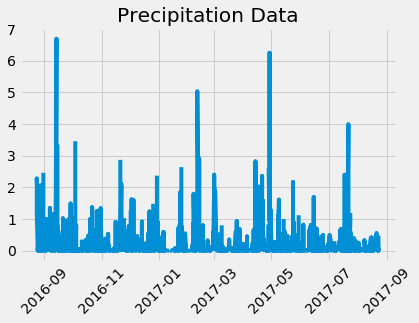

<Figure size 432x288 with 0 Axes>

In [107]:
plt.plot(df3.date, df3.prcp)
plt.xticks(rotation = 45)
plt.title("Precipitation Data")
plt.figure()
plt.show()

In [121]:
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [123]:
df.groupby('station').size().sort_values()

station
USC00518838     511
USC00517948    1372
USC00511918    1979
USC00514830    2202
USC00516128    2612
USC00519523    2669
USC00513117    2709
USC00519397    2724
USC00519281    2772
dtype: int64

In [124]:
query4 = """
select * from measurement  
where station = "USC00519281" and date > '2016-08-23'
"""

In [125]:
df5 = pd.read_sql(query4, conn)
df5.head()

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0


In [126]:
len(df5)

351

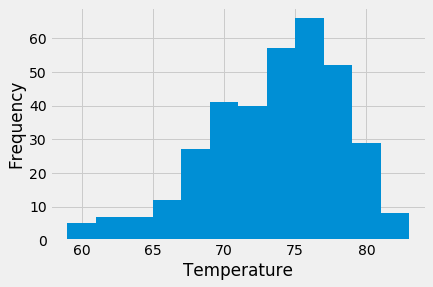

In [128]:
plt.hist(df5.tobs, bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()